In [1]:
from hapi import *
db_begin('data')

HAPI version: 1.2.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

In [ ]:
# USING LINE PROFILES

In [2]:
getHelp(PROFILE_HT)

Help on function PROFILE_HT in module hapi.hapi:

PROFILE_HT(Nu, GammaD, Gamma0, Gamma2, Delta0, Delta2, NuVC, Eta, WnGrid, YRosen=0.0, Sw=1.0)
    #-------------------------------------------------
    #      "pCqSDHC": partially-Correlated quadratic-Speed-Dependent "Hard-Collision"
    #      Subroutine to Compute the complex normalized spectral shape of an 
    #      isolated line by the pCqSDHC model
    #
    #      References:
    #
    #      1) N.H. Ngo, D. Lisak, H. Tran, J.-M. Hartmann.
    #         An isolated line-shape model to go beyond the Voigt profile in 
    #         spectroscopic databases and radiative transfer codes.
    #         JQSRT, Volume 129, November 2013, Pages 89–100
    #         http://dx.doi.org/10.1016/j.jqsrt.2013.05.034
    #
    #      2) H. Tran, N.H. Ngo, J.-M. Hartmann.
    #         Efficient computation of some speed-dependent isolated line profiles.
    #         JQSRT, Volume 129, November 2013, Pages 199–203
    #         http://dx.doi.o

In [3]:
from numpy import arange
w0 = 1000.
GammaD = 0.005
Gamma0 = 0.2
Gamma2 = 0.01 * Gamma0
Delta0 = 0.002
Delta2 = 0.001 * Delta0
nuVC = 0.2
eta = 0.5
Dw = 1.
ww = arange(w0-Dw, w0+Dw, 0.01) # GRID WITH THE STEP 0.01 
l1 = PROFILE_HT(w0,GammaD,Gamma0,Gamma2,Delta0,Delta2,nuVC,eta,ww)[0]
# now l1 contains values of HT profile calculates on the grid ww
l1 # print calculated values

0.06098218071756927

In [ ]:
# USING PARTITION SUMS

In [4]:
Q = partitionSum(1,1,[70,80,90])
Q

[20.97967, 25.43182, 30.16085]

In [6]:
T,Q = partitionSum(1,1,[70,3000],step=1.0) 
Q

array([   20.97967   ,    21.41201985,    21.84726656, ...,
       15904.940055  , 15920.78392   , 15936.640565  ])

In [ ]:
# CALCULATING ABSORPTION COEFFICIENTS

In [7]:
fetch('CO2',2,1,2000,2100)


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CO2
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
Header written to data/CO2.header
END DOWNLOAD
                     Lines parsed: 3769
PROCESSED


In [8]:
nu,coef = absorptionCoefficient_Lorentz(SourceTables='CO2', Diluent={'air':1.0})

# This example calculates a Lorentz cross section using the whole set of lines in the "CO2" table. 
# This is the simplest possible way to use these functions, 
# because the major part of parameters are constrained to their default values.

{'air': 1.0}
0.841758 seconds elapsed for abscoef; nlines = 3769


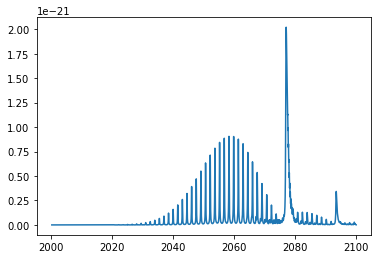

In [11]:
from pylab import plot
plot(nu,coef)
# visualize it using a plotter (Matplotlib)
# CO2, T = 296 K, p = 1 atm

In [12]:
## CALCULATING ABSORPTION, TRANSMITTANCE, AND RADIANCE SPECTRA

In [13]:
nu,coef = absorptionCoefficient_Lorentz(SourceTables='CO2',HITRAN_units=False)

{'air': 1.0}
0.845269 seconds elapsed for abscoef; nlines = 3769


In [14]:
nu,absorp = absorptionSpectrum(nu,coef)

In [15]:
nu,trans = transmittanceSpectrum(nu,coef)

In [16]:
nu,radi = radianceSpectrum(nu,coef)

In [17]:
# APPLYING INSTRUMENTAL FUNCTIONS

In [18]:
getHelp(slit_functions)

  RECTANGULAR : SLIT_RECTANGULAR
  TRIANGULAR  : SLIT_TRIANGULAR
  GAUSSIAN    : SLIT_GAUSSIAN
  DIFFRACTION : SLIT_DIFFRACTION
  MICHELSON   : SLIT_MICHELSON
  DISPERSION/LORENTZ : SLIT_DISPERSION


In [19]:
getHelp(SLIT_MICHELSON)

Help on function SLIT_MICHELSON in module hapi.hapi:

SLIT_MICHELSON(x, g)
    Instrumental (slit) function.
    B(x) = 2/γ*sin(2pi*x/γ)/(2pi*x/γ) if x!=0 else 1,
    where 1/γ is the maximum optical path difference.



In [24]:
nu_,trans_,i1,i2,slit = convolveSpectrum(nu,trans)

# nu_, trans_ – wavenumbers and transmittance for the resulting convolved spectrum.
# i1,i2 – indexes for initial nu,trans spectrum denoting the part of wavenumber range which was taken for 
# convolved spectrum. Thus, the resulting spectrum is calculated on nu[i1:i2]
# slit – array of slit function values calculated on grid “nu”

In [ ]:
# Note, in order to achieve more flexibility, one has to specify most of the optional parameters. 
# For instance, a more complete call is as follows:

In [22]:
nu_,trans_,i1,i2,slit = convolveSpectrum(nu,trans,SlitFunction=SLIT_MICHELSON,Resolution=1.0,AF_wing=20.0)

In [23]:
# ALIASES